http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf

In [1]:
#need to install lightgbm from anacondra prompt

In [86]:
#Data Preparation
#We will now import some required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the dataset
dataset = pd.read_csv('bank-additional-full.csv')
dataset = dataset.drop(['emp.var.rate','nr.employed', 'duration'], axis=1)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [87]:
dataset.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 5.7+ MB


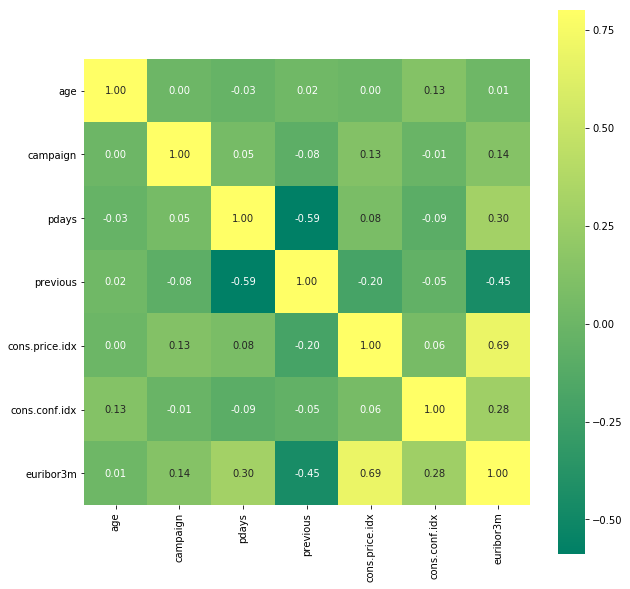

In [89]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

In [90]:
# Check for null values. 
dataset.isnull().sum().sort_values(ascending=False)

y                 0
euribor3m         0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
age               0
dtype: int64

In [91]:
#One Hot Encoding all Catergorical Variables without Order
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['job','marital','education','default','housing','loan','contact','poutcome','month','day_of_week'])
dataset = encoder.fit_transform(dataset)

# Encoding Outcome Row to Binary
#dataset['outcome'] = dataset['outcome'].map({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].map({'yes': 1, 'no': 0})

In [92]:
# splitting data
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [93]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train.shape

(35009, 42)

In [94]:
from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.776077	valid_0's l1: 0.194736	valid_0's binary_logloss: 0.329794
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777073	valid_0's l1: 0.190721	valid_0's binary_logloss: 0.317669
[3]	valid_0's auc: 0.778175	valid_0's l1: 0.187083	valid_0's binary_logloss: 0.308881
[4]	valid_0's auc: 0.777976	valid_0's l1: 0.183855	valid_0's binary_logloss: 0.302468
[5]	valid_0's auc: 0.78631	valid_0's l1: 0.180897	valid_0's binary_logloss: 0.297158
[6]	valid_0's auc: 0.785797	valid_0's l1: 0.178163	valid_0's binary_logloss: 0.292799
[7]	valid_0's auc: 0.787846	valid_0's l1: 0.175762	valid_0's binary_logloss: 0.289636
[8]	valid_0's auc: 0.788205	valid_0's l1: 0.173639	valid_0's binary_logloss: 0.287041
[9]	valid_0's auc: 0.790843	valid_0's l1: 0.171606	valid_0's binary_logloss: 0.284605
[10]	valid_0's auc: 0.791339	valid_0's l1: 0.169726	valid_0's binary_logloss: 0.282513
[11]	valid_0's auc: 0.791975	valid_0's l1: 0.168109	valid_0's binary_logloss: 0

[21]	valid_0's auc: 0.788828	valid_0's l1: 0.158831	valid_0's binary_logloss: 0.27624
[22]	valid_0's auc: 0.788482	valid_0's l1: 0.15832	valid_0's binary_logloss: 0.27622
Early stopping, best iteration is:
[17]	valid_0's auc: 0.789644	valid_0's l1: 0.161545	valid_0's binary_logloss: 0.276766
[1]	valid_0's auc: 0.777525	valid_0's l1: 0.194785	valid_0's binary_logloss: 0.329182
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777477	valid_0's l1: 0.190765	valid_0's binary_logloss: 0.316928
[3]	valid_0's auc: 0.784871	valid_0's l1: 0.187007	valid_0's binary_logloss: 0.30771
[4]	valid_0's auc: 0.78531	valid_0's l1: 0.183799	valid_0's binary_logloss: 0.301147
[5]	valid_0's auc: 0.78594	valid_0's l1: 0.180823	valid_0's binary_logloss: 0.295893
[6]	valid_0's auc: 0.789716	valid_0's l1: 0.178133	valid_0's binary_logloss: 0.291489
[7]	valid_0's auc: 0.790463	valid_0's l1: 0.17577	valid_0's binary_logloss: 0.288368
[8]	valid_0's auc: 0.791433	valid_0's l1: 0.1735

[21]	valid_0's auc: 0.797604	valid_0's l1: 0.15831	valid_0's binary_logloss: 0.273418
[22]	valid_0's auc: 0.797288	valid_0's l1: 0.15779	valid_0's binary_logloss: 0.273343
[23]	valid_0's auc: 0.797192	valid_0's l1: 0.157226	valid_0's binary_logloss: 0.273154
[24]	valid_0's auc: 0.797542	valid_0's l1: 0.15678	valid_0's binary_logloss: 0.273013
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.797784	valid_0's l1: 0.158986	valid_0's binary_logloss: 0.273689
[1]	valid_0's auc: 0.776077	valid_0's l1: 0.194736	valid_0's binary_logloss: 0.329794
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777073	valid_0's l1: 0.190721	valid_0's binary_logloss: 0.317669
[3]	valid_0's auc: 0.778175	valid_0's l1: 0.187083	valid_0's binary_logloss: 0.308881
[4]	valid_0's auc: 0.777976	valid_0's l1: 0.183855	valid_0's binary_logloss: 0.302468
[5]	valid_0's auc: 0.78631	valid_0's l1: 0.180897	valid_0's binary_logloss: 0.297158
[6]	valid_0's auc: 0.785797	va

[23]	valid_0's auc: 0.793648	valid_0's l1: 0.157396	valid_0's binary_logloss: 0.274798
Early stopping, best iteration is:
[18]	valid_0's auc: 0.794568	valid_0's l1: 0.160354	valid_0's binary_logloss: 0.275618
[1]	valid_0's auc: 0.775053	valid_0's l1: 0.194758	valid_0's binary_logloss: 0.329399
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.77575	valid_0's l1: 0.190787	valid_0's binary_logloss: 0.317388
[3]	valid_0's auc: 0.775581	valid_0's l1: 0.187134	valid_0's binary_logloss: 0.308674
[4]	valid_0's auc: 0.778226	valid_0's l1: 0.183856	valid_0's binary_logloss: 0.301755
[5]	valid_0's auc: 0.778596	valid_0's l1: 0.181027	valid_0's binary_logloss: 0.297037
[6]	valid_0's auc: 0.782995	valid_0's l1: 0.178286	valid_0's binary_logloss: 0.292625
[7]	valid_0's auc: 0.78231	valid_0's l1: 0.175863	valid_0's binary_logloss: 0.289313
[8]	valid_0's auc: 0.783638	valid_0's l1: 0.173703	valid_0's binary_logloss: 0.286533
[9]	valid_0's auc: 0.783275	valid_0's l1: 0.

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.194785	valid_0's binary_logloss: 0.329182
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777477	valid_0's l1: 0.190765	valid_0's binary_logloss: 0.316928
[3]	valid_0's auc: 0.784871	valid_0's l1: 0.187007	valid_0's binary_logloss: 0.30771
[4]	valid_0's auc: 0.78531	valid_0's l1: 0.183799	valid_0's binary_logloss: 0.301147
[5]	valid_0's auc: 0.78594	valid_0's l1: 0.180823	valid_0's binary_logloss: 0.295893
[6]	valid_0's auc: 0.789716	valid_0's l1: 0.178133	valid_0's binary_logloss: 0.291489
[7]	valid_0's auc: 0.790463	valid_0's l1: 0.17577	valid_0's binary_logloss: 0.288368
[8]	valid_0's auc: 0.791433	valid_0's l1: 0.173536	valid_0's binary_logloss: 0.285498
[9]	valid_0's auc: 0.792043	valid_0's l1: 0.171674	valid_0's binary_logloss: 0.283471
[10]	valid_0's auc: 0.792526	valid_0's l1: 0.169836	valid_0's binary_logloss: 0.28154
[11]	valid_0's auc: 0.792432	valid_0's l1: 0.168061	valid_0's binary_logloss: 0.279

[19]	valid_0's auc: 0.797631	valid_0's l1: 0.159637	valid_0's binary_logloss: 0.273905
[20]	valid_0's auc: 0.797784	valid_0's l1: 0.158986	valid_0's binary_logloss: 0.273689
[21]	valid_0's auc: 0.797604	valid_0's l1: 0.15831	valid_0's binary_logloss: 0.273418
[22]	valid_0's auc: 0.797288	valid_0's l1: 0.15779	valid_0's binary_logloss: 0.273343
[23]	valid_0's auc: 0.797192	valid_0's l1: 0.157226	valid_0's binary_logloss: 0.273154
[24]	valid_0's auc: 0.797542	valid_0's l1: 0.15678	valid_0's binary_logloss: 0.273013
[25]	valid_0's auc: 0.797706	valid_0's l1: 0.156315	valid_0's binary_logloss: 0.272847
Early stopping, best iteration is:
[20]	valid_0's auc: 0.797784	valid_0's l1: 0.158986	valid_0's binary_logloss: 0.273689
[1]	valid_0's auc: 0.776077	valid_0's l1: 0.194736	valid_0's binary_logloss: 0.329794
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777073	valid_0's l1: 0.190721	valid_0's binary_logloss: 0.317669
[3]	valid_0's auc: 0.778175	valid_0's l

[1]	valid_0's auc: 0.775053	valid_0's l1: 0.193621	valid_0's binary_logloss: 0.324748
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.775742	valid_0's l1: 0.188822	valid_0's binary_logloss: 0.311779
[3]	valid_0's auc: 0.775123	valid_0's l1: 0.184689	valid_0's binary_logloss: 0.303025
[4]	valid_0's auc: 0.780022	valid_0's l1: 0.180921	valid_0's binary_logloss: 0.296244
[5]	valid_0's auc: 0.781938	valid_0's l1: 0.17777	valid_0's binary_logloss: 0.291495
[6]	valid_0's auc: 0.783132	valid_0's l1: 0.174879	valid_0's binary_logloss: 0.2879
[7]	valid_0's auc: 0.785621	valid_0's l1: 0.172408	valid_0's binary_logloss: 0.284983
[8]	valid_0's auc: 0.78648	valid_0's l1: 0.170156	valid_0's binary_logloss: 0.282893
[9]	valid_0's auc: 0.787836	valid_0's l1: 0.168141	valid_0's binary_logloss: 0.281129
[10]	valid_0's auc: 0.789513	valid_0's l1: 0.166451	valid_0's binary_logloss: 0.279786
[11]	valid_0's auc: 0.789874	valid_0's l1: 0.164931	valid_0's binary_logloss: 0.27

[20]	valid_0's auc: 0.795439	valid_0's l1: 0.156367	valid_0's binary_logloss: 0.273142
[21]	valid_0's auc: 0.796018	valid_0's l1: 0.155837	valid_0's binary_logloss: 0.272996
[22]	valid_0's auc: 0.796252	valid_0's l1: 0.155556	valid_0's binary_logloss: 0.272913
Did not meet early stopping. Best iteration is:
[22]	valid_0's auc: 0.796252	valid_0's l1: 0.155556	valid_0's binary_logloss: 0.272913
[1]	valid_0's auc: 0.776077	valid_0's l1: 0.193589	valid_0's binary_logloss: 0.325199
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778525	valid_0's l1: 0.188662	valid_0's binary_logloss: 0.311761
[3]	valid_0's auc: 0.778418	valid_0's l1: 0.184494	valid_0's binary_logloss: 0.303022
[4]	valid_0's auc: 0.784583	valid_0's l1: 0.180731	valid_0's binary_logloss: 0.296297
[5]	valid_0's auc: 0.78606	valid_0's l1: 0.17736	valid_0's binary_logloss: 0.29126
[6]	valid_0's auc: 0.789177	valid_0's l1: 0.174512	valid_0's binary_logloss: 0.28765
[7]	valid_0's auc: 0.79122	vali

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.193647	valid_0's binary_logloss: 0.324457
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777491	valid_0's l1: 0.188781	valid_0's binary_logloss: 0.31117
[3]	valid_0's auc: 0.78533	valid_0's l1: 0.184544	valid_0's binary_logloss: 0.301946
[4]	valid_0's auc: 0.78485	valid_0's l1: 0.18081	valid_0's binary_logloss: 0.295547
[5]	valid_0's auc: 0.789276	valid_0's l1: 0.17753	valid_0's binary_logloss: 0.290491
[6]	valid_0's auc: 0.789275	valid_0's l1: 0.174733	valid_0's binary_logloss: 0.287068
[7]	valid_0's auc: 0.792236	valid_0's l1: 0.172051	valid_0's binary_logloss: 0.283817
[8]	valid_0's auc: 0.792155	valid_0's l1: 0.169728	valid_0's binary_logloss: 0.281359
[9]	valid_0's auc: 0.792948	valid_0's l1: 0.167769	valid_0's binary_logloss: 0.279603
[10]	valid_0's auc: 0.792297	valid_0's l1: 0.165989	valid_0's binary_logloss: 0.278202
[11]	valid_0's auc: 0.79207	valid_0's l1: 0.164405	valid_0's binary_logloss: 0.2770

[1]	valid_0's auc: 0.776077	valid_0's l1: 0.193589	valid_0's binary_logloss: 0.325199
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778525	valid_0's l1: 0.188662	valid_0's binary_logloss: 0.311761
[3]	valid_0's auc: 0.778418	valid_0's l1: 0.184494	valid_0's binary_logloss: 0.303022
[4]	valid_0's auc: 0.784583	valid_0's l1: 0.180731	valid_0's binary_logloss: 0.296297
[5]	valid_0's auc: 0.78606	valid_0's l1: 0.17736	valid_0's binary_logloss: 0.29126
[6]	valid_0's auc: 0.789177	valid_0's l1: 0.174512	valid_0's binary_logloss: 0.28765
[7]	valid_0's auc: 0.79122	valid_0's l1: 0.171866	valid_0's binary_logloss: 0.284332
[8]	valid_0's auc: 0.790885	valid_0's l1: 0.169686	valid_0's binary_logloss: 0.282114
[9]	valid_0's auc: 0.791098	valid_0's l1: 0.167677	valid_0's binary_logloss: 0.280249
[10]	valid_0's auc: 0.79299	valid_0's l1: 0.165903	valid_0's binary_logloss: 0.278794
[11]	valid_0's auc: 0.793195	valid_0's l1: 0.164251	valid_0's binary_logloss: 0.2776

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.193647	valid_0's binary_logloss: 0.324457
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777491	valid_0's l1: 0.188781	valid_0's binary_logloss: 0.31117
[3]	valid_0's auc: 0.78533	valid_0's l1: 0.184544	valid_0's binary_logloss: 0.301946
[4]	valid_0's auc: 0.78485	valid_0's l1: 0.18081	valid_0's binary_logloss: 0.295547
[5]	valid_0's auc: 0.789276	valid_0's l1: 0.17753	valid_0's binary_logloss: 0.290491
[6]	valid_0's auc: 0.789275	valid_0's l1: 0.174733	valid_0's binary_logloss: 0.287068
[7]	valid_0's auc: 0.792236	valid_0's l1: 0.172051	valid_0's binary_logloss: 0.283817
[8]	valid_0's auc: 0.792155	valid_0's l1: 0.169728	valid_0's binary_logloss: 0.281359
[9]	valid_0's auc: 0.792948	valid_0's l1: 0.167769	valid_0's binary_logloss: 0.279603
[10]	valid_0's auc: 0.792297	valid_0's l1: 0.165989	valid_0's binary_logloss: 0.278202
[11]	valid_0's auc: 0.79207	valid_0's l1: 0.164405	valid_0's binary_logloss: 0.2770

[1]	valid_0's auc: 0.776077	valid_0's l1: 0.192439	valid_0's binary_logloss: 0.320816
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778243	valid_0's l1: 0.186776	valid_0's binary_logloss: 0.306903
[3]	valid_0's auc: 0.778436	valid_0's l1: 0.182027	valid_0's binary_logloss: 0.298092
[4]	valid_0's auc: 0.78648	valid_0's l1: 0.177777	valid_0's binary_logloss: 0.291225
[5]	valid_0's auc: 0.790445	valid_0's l1: 0.17426	valid_0's binary_logloss: 0.286853
[6]	valid_0's auc: 0.792288	valid_0's l1: 0.171192	valid_0's binary_logloss: 0.283336
[7]	valid_0's auc: 0.792137	valid_0's l1: 0.168598	valid_0's binary_logloss: 0.280956
[8]	valid_0's auc: 0.792229	valid_0's l1: 0.166283	valid_0's binary_logloss: 0.279045
[9]	valid_0's auc: 0.792428	valid_0's l1: 0.164334	valid_0's binary_logloss: 0.277684
[10]	valid_0's auc: 0.792489	valid_0's l1: 0.162782	valid_0's binary_logloss: 0.276996
[11]	valid_0's auc: 0.792543	valid_0's l1: 0.161351	valid_0's binary_logloss: 0.

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.192506	valid_0's binary_logloss: 0.319953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784319	valid_0's l1: 0.186725	valid_0's binary_logloss: 0.305579
[3]	valid_0's auc: 0.786191	valid_0's l1: 0.181973	valid_0's binary_logloss: 0.296686
[4]	valid_0's auc: 0.788695	valid_0's l1: 0.177896	valid_0's binary_logloss: 0.290481
[5]	valid_0's auc: 0.789523	valid_0's l1: 0.174353	valid_0's binary_logloss: 0.286401
[6]	valid_0's auc: 0.791688	valid_0's l1: 0.171294	valid_0's binary_logloss: 0.282912
[7]	valid_0's auc: 0.791114	valid_0's l1: 0.168745	valid_0's binary_logloss: 0.280648
[8]	valid_0's auc: 0.791882	valid_0's l1: 0.166639	valid_0's binary_logloss: 0.278998
[9]	valid_0's auc: 0.790735	valid_0's l1: 0.164604	valid_0's binary_logloss: 0.277528
[10]	valid_0's auc: 0.791134	valid_0's l1: 0.162998	valid_0's binary_logloss: 0.276701
[11]	valid_0's auc: 0.790681	valid_0's l1: 0.161681	valid_0's binary_logloss: 

[12]	valid_0's auc: 0.792932	valid_0's l1: 0.160206	valid_0's binary_logloss: 0.275755
[13]	valid_0's auc: 0.794136	valid_0's l1: 0.158999	valid_0's binary_logloss: 0.274981
[14]	valid_0's auc: 0.792511	valid_0's l1: 0.15807	valid_0's binary_logloss: 0.274842
[15]	valid_0's auc: 0.792981	valid_0's l1: 0.157079	valid_0's binary_logloss: 0.274364
[16]	valid_0's auc: 0.792466	valid_0's l1: 0.156378	valid_0's binary_logloss: 0.274268
[17]	valid_0's auc: 0.791455	valid_0's l1: 0.155876	valid_0's binary_logloss: 0.2743
[18]	valid_0's auc: 0.792315	valid_0's l1: 0.15524	valid_0's binary_logloss: 0.273989
Early stopping, best iteration is:
[13]	valid_0's auc: 0.794136	valid_0's l1: 0.158999	valid_0's binary_logloss: 0.274981
[1]	valid_0's auc: 0.775053	valid_0's l1: 0.192481	valid_0's binary_logloss: 0.320329
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.775585	valid_0's l1: 0.186965	valid_0's binary_logloss: 0.306947
[3]	valid_0's auc: 0.775555	valid_0's l1

[18]	valid_0's auc: 0.79451	valid_0's l1: 0.155685	valid_0's binary_logloss: 0.273598
[19]	valid_0's auc: 0.793546	valid_0's l1: 0.15519	valid_0's binary_logloss: 0.273571
[20]	valid_0's auc: 0.792552	valid_0's l1: 0.154855	valid_0's binary_logloss: 0.273669
[21]	valid_0's auc: 0.793522	valid_0's l1: 0.154458	valid_0's binary_logloss: 0.273605
Early stopping, best iteration is:
[16]	valid_0's auc: 0.79518	valid_0's l1: 0.156538	valid_0's binary_logloss: 0.273663
[1]	valid_0's auc: 0.776077	valid_0's l1: 0.192439	valid_0's binary_logloss: 0.320816
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778243	valid_0's l1: 0.186776	valid_0's binary_logloss: 0.306903
[3]	valid_0's auc: 0.778436	valid_0's l1: 0.182027	valid_0's binary_logloss: 0.298092
[4]	valid_0's auc: 0.78648	valid_0's l1: 0.177777	valid_0's binary_logloss: 0.291225
[5]	valid_0's auc: 0.790445	valid_0's l1: 0.17426	valid_0's binary_logloss: 0.286853
[6]	valid_0's auc: 0.792288	valid_0's l1: 0.

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.192506	valid_0's binary_logloss: 0.319953
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784319	valid_0's l1: 0.186725	valid_0's binary_logloss: 0.305579
[3]	valid_0's auc: 0.786191	valid_0's l1: 0.181973	valid_0's binary_logloss: 0.296686
[4]	valid_0's auc: 0.788695	valid_0's l1: 0.177896	valid_0's binary_logloss: 0.290481
[5]	valid_0's auc: 0.789523	valid_0's l1: 0.174353	valid_0's binary_logloss: 0.286401
[6]	valid_0's auc: 0.791688	valid_0's l1: 0.171294	valid_0's binary_logloss: 0.282912
[7]	valid_0's auc: 0.791114	valid_0's l1: 0.168745	valid_0's binary_logloss: 0.280648
[8]	valid_0's auc: 0.791882	valid_0's l1: 0.166639	valid_0's binary_logloss: 0.278998
[9]	valid_0's auc: 0.790735	valid_0's l1: 0.164604	valid_0's binary_logloss: 0.277528
[10]	valid_0's auc: 0.791134	valid_0's l1: 0.162998	valid_0's binary_logloss: 0.276701
[11]	valid_0's auc: 0.790681	valid_0's l1: 0.161681	valid_0's binary_logloss: 

[1]	valid_0's auc: 0.775053	valid_0's l1: 0.191339	valid_0's binary_logloss: 0.316158
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.775135	valid_0's l1: 0.185226	valid_0's binary_logloss: 0.302788
[3]	valid_0's auc: 0.776207	valid_0's l1: 0.180067	valid_0's binary_logloss: 0.29457
[4]	valid_0's auc: 0.781501	valid_0's l1: 0.175682	valid_0's binary_logloss: 0.28834
[5]	valid_0's auc: 0.782944	valid_0's l1: 0.17208	valid_0's binary_logloss: 0.284537
[6]	valid_0's auc: 0.780884	valid_0's l1: 0.169064	valid_0's binary_logloss: 0.282053
[7]	valid_0's auc: 0.785966	valid_0's l1: 0.166589	valid_0's binary_logloss: 0.280115
[8]	valid_0's auc: 0.78812	valid_0's l1: 0.164512	valid_0's binary_logloss: 0.279003
[9]	valid_0's auc: 0.788735	valid_0's l1: 0.16271	valid_0's binary_logloss: 0.278246
[10]	valid_0's auc: 0.788158	valid_0's l1: 0.161223	valid_0's binary_logloss: 0.277791
[11]	valid_0's auc: 0.785933	valid_0's l1: 0.16004	valid_0's binary_logloss: 0.2777

[1]	valid_0's auc: 0.776077	valid_0's l1: 0.191285	valid_0's binary_logloss: 0.316657
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777378	valid_0's l1: 0.18489	valid_0's binary_logloss: 0.302436
[3]	valid_0's auc: 0.784427	valid_0's l1: 0.179366	valid_0's binary_logloss: 0.293141
[4]	valid_0's auc: 0.78557	valid_0's l1: 0.175027	valid_0's binary_logloss: 0.287733
[5]	valid_0's auc: 0.79184	valid_0's l1: 0.171209	valid_0's binary_logloss: 0.283379
[6]	valid_0's auc: 0.79173	valid_0's l1: 0.168065	valid_0's binary_logloss: 0.2804
[7]	valid_0's auc: 0.792381	valid_0's l1: 0.165498	valid_0's binary_logloss: 0.278183
[8]	valid_0's auc: 0.793931	valid_0's l1: 0.163282	valid_0's binary_logloss: 0.276616
[9]	valid_0's auc: 0.794787	valid_0's l1: 0.161459	valid_0's binary_logloss: 0.275458
[10]	valid_0's auc: 0.793991	valid_0's l1: 0.159776	valid_0's binary_logloss: 0.274623
[11]	valid_0's auc: 0.794799	valid_0's l1: 0.158587	valid_0's binary_logloss: 0.2742

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.191364	valid_0's binary_logloss: 0.315685
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784867	valid_0's l1: 0.184883	valid_0's binary_logloss: 0.301244
[3]	valid_0's auc: 0.78486	valid_0's l1: 0.179847	valid_0's binary_logloss: 0.29291
[4]	valid_0's auc: 0.787557	valid_0's l1: 0.175419	valid_0's binary_logloss: 0.287155
[5]	valid_0's auc: 0.790791	valid_0's l1: 0.171631	valid_0's binary_logloss: 0.28288
[6]	valid_0's auc: 0.790982	valid_0's l1: 0.168683	valid_0's binary_logloss: 0.280409
[7]	valid_0's auc: 0.792053	valid_0's l1: 0.166014	valid_0's binary_logloss: 0.278385
[8]	valid_0's auc: 0.791226	valid_0's l1: 0.163913	valid_0's binary_logloss: 0.277169
[9]	valid_0's auc: 0.790291	valid_0's l1: 0.162225	valid_0's binary_logloss: 0.276333
[10]	valid_0's auc: 0.790655	valid_0's l1: 0.160653	valid_0's binary_logloss: 0.2756
[11]	valid_0's auc: 0.790674	valid_0's l1: 0.159384	valid_0's binary_logloss: 0.275

[19]	valid_0's auc: 0.796247	valid_0's l1: 0.15378	valid_0's binary_logloss: 0.272878
[20]	valid_0's auc: 0.794265	valid_0's l1: 0.153568	valid_0's binary_logloss: 0.272887
Early stopping, best iteration is:
[15]	valid_0's auc: 0.797766	valid_0's l1: 0.15549	valid_0's binary_logloss: 0.273387
[1]	valid_0's auc: 0.775053	valid_0's l1: 0.191339	valid_0's binary_logloss: 0.316158
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.775135	valid_0's l1: 0.185226	valid_0's binary_logloss: 0.302788
[3]	valid_0's auc: 0.776207	valid_0's l1: 0.180067	valid_0's binary_logloss: 0.29457
[4]	valid_0's auc: 0.781501	valid_0's l1: 0.175682	valid_0's binary_logloss: 0.28834
[5]	valid_0's auc: 0.782944	valid_0's l1: 0.17208	valid_0's binary_logloss: 0.284537
[6]	valid_0's auc: 0.780884	valid_0's l1: 0.169064	valid_0's binary_logloss: 0.282053
[7]	valid_0's auc: 0.785966	valid_0's l1: 0.166589	valid_0's binary_logloss: 0.280115
[8]	valid_0's auc: 0.78812	valid_0's l1: 0.164

[18]	valid_0's auc: 0.796252	valid_0's l1: 0.154754	valid_0's binary_logloss: 0.273851
[19]	valid_0's auc: 0.796233	valid_0's l1: 0.154312	valid_0's binary_logloss: 0.27371
[20]	valid_0's auc: 0.796632	valid_0's l1: 0.153997	valid_0's binary_logloss: 0.273519
[21]	valid_0's auc: 0.795176	valid_0's l1: 0.15378	valid_0's binary_logloss: 0.273684
[22]	valid_0's auc: 0.794264	valid_0's l1: 0.153734	valid_0's binary_logloss: 0.273944
Early stopping, best iteration is:
[17]	valid_0's auc: 0.796995	valid_0's l1: 0.154953	valid_0's binary_logloss: 0.273659
[1]	valid_0's auc: 0.776077	valid_0's l1: 0.191285	valid_0's binary_logloss: 0.316657
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777378	valid_0's l1: 0.18489	valid_0's binary_logloss: 0.302436
[3]	valid_0's auc: 0.784427	valid_0's l1: 0.179366	valid_0's binary_logloss: 0.293141
[4]	valid_0's auc: 0.78557	valid_0's l1: 0.175027	valid_0's binary_logloss: 0.287733
[5]	valid_0's auc: 0.79184	valid_0's l1: 0

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.190221	valid_0's binary_logloss: 0.311668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784002	valid_0's l1: 0.183164	valid_0's binary_logloss: 0.297484
[3]	valid_0's auc: 0.785334	valid_0's l1: 0.177405	valid_0's binary_logloss: 0.289087
[4]	valid_0's auc: 0.790206	valid_0's l1: 0.17267	valid_0's binary_logloss: 0.283475
[5]	valid_0's auc: 0.790641	valid_0's l1: 0.169055	valid_0's binary_logloss: 0.28013
[6]	valid_0's auc: 0.791209	valid_0's l1: 0.166004	valid_0's binary_logloss: 0.27803
[7]	valid_0's auc: 0.792263	valid_0's l1: 0.163433	valid_0's binary_logloss: 0.27646
[8]	valid_0's auc: 0.792359	valid_0's l1: 0.161482	valid_0's binary_logloss: 0.275384
[9]	valid_0's auc: 0.794022	valid_0's l1: 0.159748	valid_0's binary_logloss: 0.274602
[10]	valid_0's auc: 0.792671	valid_0's l1: 0.158525	valid_0's binary_logloss: 0.274377
[11]	valid_0's auc: 0.791677	valid_0's l1: 0.157334	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.190221	valid_0's binary_logloss: 0.311668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784002	valid_0's l1: 0.183164	valid_0's binary_logloss: 0.297484
[3]	valid_0's auc: 0.785334	valid_0's l1: 0.177405	valid_0's binary_logloss: 0.289087
[4]	valid_0's auc: 0.790206	valid_0's l1: 0.17267	valid_0's binary_logloss: 0.283475
[5]	valid_0's auc: 0.790641	valid_0's l1: 0.169055	valid_0's binary_logloss: 0.28013
[6]	valid_0's auc: 0.791209	valid_0's l1: 0.166004	valid_0's binary_logloss: 0.27803
[7]	valid_0's auc: 0.792263	valid_0's l1: 0.163433	valid_0's binary_logloss: 0.27646
[8]	valid_0's auc: 0.792359	valid_0's l1: 0.161482	valid_0's binary_logloss: 0.275384
[9]	valid_0's auc: 0.794022	valid_0's l1: 0.159748	valid_0's binary_logloss: 0.274602
[10]	valid_0's auc: 0.792671	valid_0's l1: 0.158525	valid_0's binary_logloss: 0.274377
[11]	valid_0's auc: 0.791677	valid_0's l1: 0.157334	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.190221	valid_0's binary_logloss: 0.311668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784002	valid_0's l1: 0.183164	valid_0's binary_logloss: 0.297484
[3]	valid_0's auc: 0.785334	valid_0's l1: 0.177405	valid_0's binary_logloss: 0.289087
[4]	valid_0's auc: 0.790206	valid_0's l1: 0.17267	valid_0's binary_logloss: 0.283475
[5]	valid_0's auc: 0.790641	valid_0's l1: 0.169055	valid_0's binary_logloss: 0.28013
[6]	valid_0's auc: 0.791209	valid_0's l1: 0.166004	valid_0's binary_logloss: 0.27803
[7]	valid_0's auc: 0.792263	valid_0's l1: 0.163433	valid_0's binary_logloss: 0.27646
[8]	valid_0's auc: 0.792359	valid_0's l1: 0.161482	valid_0's binary_logloss: 0.275384
[9]	valid_0's auc: 0.794022	valid_0's l1: 0.159748	valid_0's binary_logloss: 0.274602
[10]	valid_0's auc: 0.792671	valid_0's l1: 0.158525	valid_0's binary_logloss: 0.274377
[11]	valid_0's auc: 0.791677	valid_0's l1: 0.157334	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777525	valid_0's l1: 0.190221	valid_0's binary_logloss: 0.311668
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.784002	valid_0's l1: 0.183164	valid_0's binary_logloss: 0.297484
[3]	valid_0's auc: 0.785334	valid_0's l1: 0.177405	valid_0's binary_logloss: 0.289087
[4]	valid_0's auc: 0.790206	valid_0's l1: 0.17267	valid_0's binary_logloss: 0.283475
[5]	valid_0's auc: 0.790641	valid_0's l1: 0.169055	valid_0's binary_logloss: 0.28013
[6]	valid_0's auc: 0.791209	valid_0's l1: 0.166004	valid_0's binary_logloss: 0.27803
[7]	valid_0's auc: 0.792263	valid_0's l1: 0.163433	valid_0's binary_logloss: 0.27646
[8]	valid_0's auc: 0.792359	valid_0's l1: 0.161482	valid_0's binary_logloss: 0.275384
[9]	valid_0's auc: 0.794022	valid_0's l1: 0.159748	valid_0's binary_logloss: 0.274602
[10]	valid_0's auc: 0.792671	valid_0's l1: 0.158525	valid_0's binary_logloss: 0.274377
[11]	valid_0's auc: 0.791677	valid_0's l1: 0.157334	valid_0's binary_logloss: 0.27

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 20}


In [98]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.777035	valid_0's l1: 0.190009	valid_0's binary_logloss: 0.312175
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777178	valid_0's l1: 0.183252	valid_0's binary_logloss: 0.298563
[3]	valid_0's auc: 0.784845	valid_0's l1: 0.177345	valid_0's binary_logloss: 0.2895
[4]	valid_0's auc: 0.787288	valid_0's l1: 0.172626	valid_0's binary_logloss: 0.283999
[5]	valid_0's auc: 0.790358	valid_0's l1: 0.168931	valid_0's binary_logloss: 0.28009
[6]	valid_0's auc: 0.793279	valid_0's l1: 0.165931	valid_0's binary_logloss: 0.277614
[7]	valid_0's auc: 0.792988	valid_0's l1: 0.163429	valid_0's binary_logloss: 0.276035
[8]	valid_0's auc: 0.793635	valid_0's l1: 0.161341	valid_0's binary_logloss: 0.274799
[9]	valid_0's auc: 0.791753	valid_0's l1: 0.159901	valid_0's binary_logloss: 0.274552
[10]	valid_0's auc: 0.793142	valid_0's l1: 0.158275	valid_0's binary_logloss: 0.273668
[11]	valid_0's auc: 0.792665	valid_0's l1: 0.157275	valid_0's binary_logloss: 0.2

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

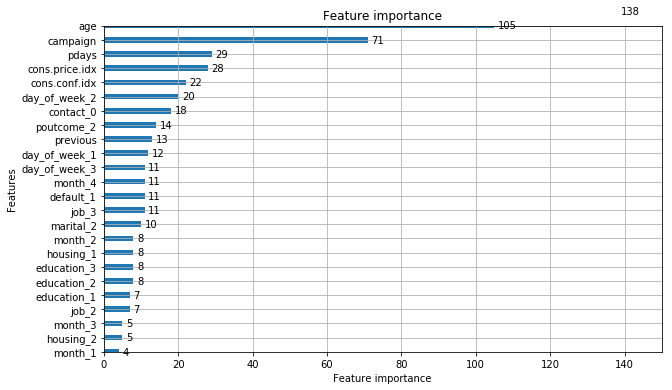

In [99]:
#Dimensionality reduction using feature importances
#features importance graph
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25,
                         ylabel='Features',
                         xlim = (0,150), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [100]:
# For each feature of our dataset, the result of the following
# code snippet contains numbers of times a feature is used in a model.
sorted(gbm.feature_importances_,reverse=True)

[138,
 105,
 71,
 29,
 28,
 22,
 20,
 18,
 14,
 13,
 12,
 11,
 11,
 11,
 11,
 10,
 8,
 8,
 8,
 8,
 7,
 7,
 5,
 5,
 4,
 4,
 4,
 3,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [101]:
# The code below aims to find where at least 85% 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

11 0.8566666666666667


In [102]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.7968618396212717


In [103]:
#Drop features to reduce dimensionality to save training time and space

X = X.drop(['marital','housing','loan','previous','default'], axis=1)


KeyError: "['marital' 'housing' 'loan' 'default'] not found in axis"

In [104]:
print(X)

       age  job_0  job_1  job_2  job_3  job_4  marital_0  marital_1  \
0       56      0      0      0      0      1          0          0   
1       57      0      0      0      1      0          0          0   
2       37      0      0      0      1      0          0          0   
3       40      0      0      0      1      1          0          0   
4       56      0      0      0      1      0          0          0   
5       45      0      0      0      1      0          0          0   
6       59      0      0      0      1      1          0          0   
7       41      0      0      1      0      0          0          0   
8       24      0      0      1      0      1          0          1   
9       25      0      0      0      1      0          0          1   
10      41      0      0      1      0      0          0          0   
11      25      0      0      0      1      0          0          1   
12      29      0      0      1      0      0          0          1   
13    

In [105]:
# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.777138	valid_0's l1: 0.195212	valid_0's binary_logloss: 0.331057
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.779095	valid_0's l1: 0.191149	valid_0's binary_logloss: 0.318797
[3]	valid_0's auc: 0.778528	valid_0's l1: 0.187521	valid_0's binary_logloss: 0.310124
[4]	valid_0's auc: 0.782394	valid_0's l1: 0.184283	valid_0's binary_logloss: 0.303526
[5]	valid_0's auc: 0.78566	valid_0's l1: 0.181191	valid_0's binary_logloss: 0.297967
[6]	valid_0's auc: 0.788357	valid_0's l1: 0.178489	valid_0's binary_logloss: 0.293755
[7]	valid_0's auc: 0.790282	valid_0's l1: 0.176071	valid_0's binary_logloss: 0.290361
[8]	valid_0's auc: 0.790049	valid_0's l1: 0.173989	valid_0's binary_logloss: 0.287826
[9]	valid_0's auc: 0.789702	valid_0's l1: 0.172065	valid_0's binary_logloss: 0.285623
[10]	valid_0's auc: 0.78761	valid_0's l1: 0.170258	valid_0's binary_logloss: 0.283758
[11]	valid_0's auc: 0.788367	valid_0's l1: 0.168533	valid_0's binary_logloss: 0.

[20]	valid_0's auc: 0.799012	valid_0's l1: 0.158898	valid_0's binary_logloss: 0.274863
Early stopping, best iteration is:
[15]	valid_0's auc: 0.802365	valid_0's l1: 0.16285	valid_0's binary_logloss: 0.276466
[1]	valid_0's auc: 0.777138	valid_0's l1: 0.195212	valid_0's binary_logloss: 0.331057
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.779095	valid_0's l1: 0.191149	valid_0's binary_logloss: 0.318797
[3]	valid_0's auc: 0.778528	valid_0's l1: 0.187521	valid_0's binary_logloss: 0.310124
[4]	valid_0's auc: 0.782394	valid_0's l1: 0.184283	valid_0's binary_logloss: 0.303526
[5]	valid_0's auc: 0.78566	valid_0's l1: 0.181191	valid_0's binary_logloss: 0.297967
[6]	valid_0's auc: 0.788357	valid_0's l1: 0.178489	valid_0's binary_logloss: 0.293755
[7]	valid_0's auc: 0.790282	valid_0's l1: 0.176071	valid_0's binary_logloss: 0.290361
[8]	valid_0's auc: 0.790049	valid_0's l1: 0.173989	valid_0's binary_logloss: 0.287826
[9]	valid_0's auc: 0.789702	valid_0's l1: 0.

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.195212	valid_0's binary_logloss: 0.331057
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.779095	valid_0's l1: 0.191149	valid_0's binary_logloss: 0.318797
[3]	valid_0's auc: 0.778528	valid_0's l1: 0.187521	valid_0's binary_logloss: 0.310124
[4]	valid_0's auc: 0.782394	valid_0's l1: 0.184283	valid_0's binary_logloss: 0.303526
[5]	valid_0's auc: 0.78566	valid_0's l1: 0.181191	valid_0's binary_logloss: 0.297967
[6]	valid_0's auc: 0.788357	valid_0's l1: 0.178489	valid_0's binary_logloss: 0.293755
[7]	valid_0's auc: 0.790282	valid_0's l1: 0.176071	valid_0's binary_logloss: 0.290361
[8]	valid_0's auc: 0.790049	valid_0's l1: 0.173989	valid_0's binary_logloss: 0.287826
[9]	valid_0's auc: 0.789702	valid_0's l1: 0.172065	valid_0's binary_logloss: 0.285623
[10]	valid_0's auc: 0.78761	valid_0's l1: 0.170258	valid_0's binary_logloss: 0.283758
[11]	valid_0's auc: 0.788367	valid_0's l1: 0.168533	valid_0's binary_logloss: 0.

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.195212	valid_0's binary_logloss: 0.331057
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.779095	valid_0's l1: 0.191149	valid_0's binary_logloss: 0.318797
[3]	valid_0's auc: 0.778528	valid_0's l1: 0.187521	valid_0's binary_logloss: 0.310124
[4]	valid_0's auc: 0.782394	valid_0's l1: 0.184283	valid_0's binary_logloss: 0.303526
[5]	valid_0's auc: 0.78566	valid_0's l1: 0.181191	valid_0's binary_logloss: 0.297967
[6]	valid_0's auc: 0.788357	valid_0's l1: 0.178489	valid_0's binary_logloss: 0.293755
[7]	valid_0's auc: 0.790282	valid_0's l1: 0.176071	valid_0's binary_logloss: 0.290361
[8]	valid_0's auc: 0.790049	valid_0's l1: 0.173989	valid_0's binary_logloss: 0.287826
[9]	valid_0's auc: 0.789702	valid_0's l1: 0.172065	valid_0's binary_logloss: 0.285623
[10]	valid_0's auc: 0.78761	valid_0's l1: 0.170258	valid_0's binary_logloss: 0.283758
[11]	valid_0's auc: 0.788367	valid_0's l1: 0.168533	valid_0's binary_logloss: 0.

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.194065	valid_0's binary_logloss: 0.326411
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778965	valid_0's l1: 0.189146	valid_0's binary_logloss: 0.313021
[3]	valid_0's auc: 0.781426	valid_0's l1: 0.184915	valid_0's binary_logloss: 0.304042
[4]	valid_0's auc: 0.783401	valid_0's l1: 0.181132	valid_0's binary_logloss: 0.297498
[5]	valid_0's auc: 0.786767	valid_0's l1: 0.177807	valid_0's binary_logloss: 0.292529
[6]	valid_0's auc: 0.787438	valid_0's l1: 0.175024	valid_0's binary_logloss: 0.28908
[7]	valid_0's auc: 0.786488	valid_0's l1: 0.172478	valid_0's binary_logloss: 0.286146
[8]	valid_0's auc: 0.788639	valid_0's l1: 0.170046	valid_0's binary_logloss: 0.283252
[9]	valid_0's auc: 0.788215	valid_0's l1: 0.16819	valid_0's binary_logloss: 0.281548
[10]	valid_0's auc: 0.788376	valid_0's l1: 0.1665	valid_0's binary_logloss: 0.280118
[11]	valid_0's auc: 0.789768	valid_0's l1: 0.164847	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.776958	valid_0's l1: 0.193789	valid_0's binary_logloss: 0.32648
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.780666	valid_0's l1: 0.188894	valid_0's binary_logloss: 0.313186
[3]	valid_0's auc: 0.781569	valid_0's l1: 0.184509	valid_0's binary_logloss: 0.303991
[4]	valid_0's auc: 0.789152	valid_0's l1: 0.180747	valid_0's binary_logloss: 0.297252
[5]	valid_0's auc: 0.790329	valid_0's l1: 0.177354	valid_0's binary_logloss: 0.292161
[6]	valid_0's auc: 0.790668	valid_0's l1: 0.174413	valid_0's binary_logloss: 0.28846
[7]	valid_0's auc: 0.794801	valid_0's l1: 0.171604	valid_0's binary_logloss: 0.28431
[8]	valid_0's auc: 0.797557	valid_0's l1: 0.169284	valid_0's binary_logloss: 0.281875
[9]	valid_0's auc: 0.798741	valid_0's l1: 0.16733	valid_0's binary_logloss: 0.279922
[10]	valid_0's auc: 0.79953	valid_0's l1: 0.165519	valid_0's binary_logloss: 0.278148
[11]	valid_0's auc: 0.798437	valid_0's l1: 0.164032	valid_0's binary_logloss: 0.277

[20]	valid_0's auc: 0.800625	valid_0's l1: 0.154734	valid_0's binary_logloss: 0.271396
Early stopping, best iteration is:
[15]	valid_0's auc: 0.803481	valid_0's l1: 0.158326	valid_0's binary_logloss: 0.272882
[1]	valid_0's auc: 0.776958	valid_0's l1: 0.193789	valid_0's binary_logloss: 0.32648
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.780666	valid_0's l1: 0.188894	valid_0's binary_logloss: 0.313186
[3]	valid_0's auc: 0.781569	valid_0's l1: 0.184509	valid_0's binary_logloss: 0.303991
[4]	valid_0's auc: 0.789152	valid_0's l1: 0.180747	valid_0's binary_logloss: 0.297252
[5]	valid_0's auc: 0.790329	valid_0's l1: 0.177354	valid_0's binary_logloss: 0.292161
[6]	valid_0's auc: 0.790668	valid_0's l1: 0.174413	valid_0's binary_logloss: 0.28846
[7]	valid_0's auc: 0.794801	valid_0's l1: 0.171604	valid_0's binary_logloss: 0.28431
[8]	valid_0's auc: 0.797557	valid_0's l1: 0.169284	valid_0's binary_logloss: 0.281875
[9]	valid_0's auc: 0.798741	valid_0's l1: 0.1

[18]	valid_0's auc: 0.802793	valid_0's l1: 0.156043	valid_0's binary_logloss: 0.27196
[19]	valid_0's auc: 0.800814	valid_0's l1: 0.155409	valid_0's binary_logloss: 0.271827
[20]	valid_0's auc: 0.800625	valid_0's l1: 0.154734	valid_0's binary_logloss: 0.271396
Early stopping, best iteration is:
[15]	valid_0's auc: 0.803481	valid_0's l1: 0.158326	valid_0's binary_logloss: 0.272882
[1]	valid_0's auc: 0.776958	valid_0's l1: 0.193789	valid_0's binary_logloss: 0.32648
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.780666	valid_0's l1: 0.188894	valid_0's binary_logloss: 0.313186
[3]	valid_0's auc: 0.781569	valid_0's l1: 0.184509	valid_0's binary_logloss: 0.303991
[4]	valid_0's auc: 0.789152	valid_0's l1: 0.180747	valid_0's binary_logloss: 0.297252
[5]	valid_0's auc: 0.790329	valid_0's l1: 0.177354	valid_0's binary_logloss: 0.292161
[6]	valid_0's auc: 0.790668	valid_0's l1: 0.174413	valid_0's binary_logloss: 0.28846
[7]	valid_0's auc: 0.794801	valid_0's l1: 0

[1]	valid_0's auc: 0.777371	valid_0's l1: 0.193808	valid_0's binary_logloss: 0.326345
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.783037	valid_0's l1: 0.188802	valid_0's binary_logloss: 0.312726
[3]	valid_0's auc: 0.783045	valid_0's l1: 0.184363	valid_0's binary_logloss: 0.303469
[4]	valid_0's auc: 0.78175	valid_0's l1: 0.18055	valid_0's binary_logloss: 0.297017
[5]	valid_0's auc: 0.783452	valid_0's l1: 0.177069	valid_0's binary_logloss: 0.291772
[6]	valid_0's auc: 0.792318	valid_0's l1: 0.173913	valid_0's binary_logloss: 0.286892
[7]	valid_0's auc: 0.792883	valid_0's l1: 0.171237	valid_0's binary_logloss: 0.283869
[8]	valid_0's auc: 0.797494	valid_0's l1: 0.168685	valid_0's binary_logloss: 0.280545
[9]	valid_0's auc: 0.798357	valid_0's l1: 0.16658	valid_0's binary_logloss: 0.278438
[10]	valid_0's auc: 0.798845	valid_0's l1: 0.164871	valid_0's binary_logloss: 0.27717
[11]	valid_0's auc: 0.798171	valid_0's l1: 0.163196	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777371	valid_0's l1: 0.192592	valid_0's binary_logloss: 0.321876
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777488	valid_0's l1: 0.186906	valid_0's binary_logloss: 0.308044
[3]	valid_0's auc: 0.785818	valid_0's l1: 0.181888	valid_0's binary_logloss: 0.29868
[4]	valid_0's auc: 0.785321	valid_0's l1: 0.17763	valid_0's binary_logloss: 0.292108
[5]	valid_0's auc: 0.788444	valid_0's l1: 0.173948	valid_0's binary_logloss: 0.287345
[6]	valid_0's auc: 0.795064	valid_0's l1: 0.170673	valid_0's binary_logloss: 0.283135
[7]	valid_0's auc: 0.797694	valid_0's l1: 0.168025	valid_0's binary_logloss: 0.280556
[8]	valid_0's auc: 0.794733	valid_0's l1: 0.165789	valid_0's binary_logloss: 0.278716
[9]	valid_0's auc: 0.795329	valid_0's l1: 0.163712	valid_0's binary_logloss: 0.277285
[10]	valid_0's auc: 0.795843	valid_0's l1: 0.161961	valid_0's binary_logloss: 0.276204
[11]	valid_0's auc: 0.79786	valid_0's l1: 0.160258	valid_0's binary_logloss: 0.2

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.19291	valid_0's binary_logloss: 0.321982
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778842	valid_0's l1: 0.187346	valid_0's binary_logloss: 0.3084
[3]	valid_0's auc: 0.783801	valid_0's l1: 0.182578	valid_0's binary_logloss: 0.299427
[4]	valid_0's auc: 0.788249	valid_0's l1: 0.178479	valid_0's binary_logloss: 0.293199
[5]	valid_0's auc: 0.787496	valid_0's l1: 0.174913	valid_0's binary_logloss: 0.288685
[6]	valid_0's auc: 0.789405	valid_0's l1: 0.17191	valid_0's binary_logloss: 0.28504
[7]	valid_0's auc: 0.790376	valid_0's l1: 0.169325	valid_0's binary_logloss: 0.282534
[8]	valid_0's auc: 0.787286	valid_0's l1: 0.167052	valid_0's binary_logloss: 0.280817
[9]	valid_0's auc: 0.78877	valid_0's l1: 0.165364	valid_0's binary_logloss: 0.279792
[10]	valid_0's auc: 0.789324	valid_0's l1: 0.163822	valid_0's binary_logloss: 0.27866
[11]	valid_0's auc: 0.788967	valid_0's l1: 0.162578	valid_0's binary_logloss: 0.27802

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.19291	valid_0's binary_logloss: 0.321982
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778842	valid_0's l1: 0.187346	valid_0's binary_logloss: 0.3084
[3]	valid_0's auc: 0.783801	valid_0's l1: 0.182578	valid_0's binary_logloss: 0.299427
[4]	valid_0's auc: 0.788249	valid_0's l1: 0.178479	valid_0's binary_logloss: 0.293199
[5]	valid_0's auc: 0.787496	valid_0's l1: 0.174913	valid_0's binary_logloss: 0.288685
[6]	valid_0's auc: 0.789405	valid_0's l1: 0.17191	valid_0's binary_logloss: 0.28504
[7]	valid_0's auc: 0.790376	valid_0's l1: 0.169325	valid_0's binary_logloss: 0.282534
[8]	valid_0's auc: 0.787286	valid_0's l1: 0.167052	valid_0's binary_logloss: 0.280817
[9]	valid_0's auc: 0.78877	valid_0's l1: 0.165364	valid_0's binary_logloss: 0.279792
[10]	valid_0's auc: 0.789324	valid_0's l1: 0.163822	valid_0's binary_logloss: 0.27866
[11]	valid_0's auc: 0.788967	valid_0's l1: 0.162578	valid_0's binary_logloss: 0.27802

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.19291	valid_0's binary_logloss: 0.321982
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778842	valid_0's l1: 0.187346	valid_0's binary_logloss: 0.3084
[3]	valid_0's auc: 0.783801	valid_0's l1: 0.182578	valid_0's binary_logloss: 0.299427
[4]	valid_0's auc: 0.788249	valid_0's l1: 0.178479	valid_0's binary_logloss: 0.293199
[5]	valid_0's auc: 0.787496	valid_0's l1: 0.174913	valid_0's binary_logloss: 0.288685
[6]	valid_0's auc: 0.789405	valid_0's l1: 0.17191	valid_0's binary_logloss: 0.28504
[7]	valid_0's auc: 0.790376	valid_0's l1: 0.169325	valid_0's binary_logloss: 0.282534
[8]	valid_0's auc: 0.787286	valid_0's l1: 0.167052	valid_0's binary_logloss: 0.280817
[9]	valid_0's auc: 0.78877	valid_0's l1: 0.165364	valid_0's binary_logloss: 0.279792
[10]	valid_0's auc: 0.789324	valid_0's l1: 0.163822	valid_0's binary_logloss: 0.27866
[11]	valid_0's auc: 0.788967	valid_0's l1: 0.162578	valid_0's binary_logloss: 0.27802

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.191748	valid_0's binary_logloss: 0.317787
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.77899	valid_0's l1: 0.18538	valid_0's binary_logloss: 0.303864
[3]	valid_0's auc: 0.784339	valid_0's l1: 0.180179	valid_0's binary_logloss: 0.29515
[4]	valid_0's auc: 0.789563	valid_0's l1: 0.175748	valid_0's binary_logloss: 0.288931
[5]	valid_0's auc: 0.790537	valid_0's l1: 0.172139	valid_0's binary_logloss: 0.284895
[6]	valid_0's auc: 0.787491	valid_0's l1: 0.169147	valid_0's binary_logloss: 0.282201
[7]	valid_0's auc: 0.788364	valid_0's l1: 0.166678	valid_0's binary_logloss: 0.280469
[8]	valid_0's auc: 0.789988	valid_0's l1: 0.164473	valid_0's binary_logloss: 0.278857
[9]	valid_0's auc: 0.789718	valid_0's l1: 0.162942	valid_0's binary_logloss: 0.278065
[10]	valid_0's auc: 0.788555	valid_0's l1: 0.161531	valid_0's binary_logloss: 0.277606
Early stopping, best iteration is:
[5]	valid_0's auc: 0.790537	valid_0's l1: 0.17

[9]	valid_0's auc: 0.789718	valid_0's l1: 0.162942	valid_0's binary_logloss: 0.278065
[10]	valid_0's auc: 0.788555	valid_0's l1: 0.161531	valid_0's binary_logloss: 0.277606
Early stopping, best iteration is:
[5]	valid_0's auc: 0.790537	valid_0's l1: 0.172139	valid_0's binary_logloss: 0.284895
[1]	valid_0's auc: 0.777371	valid_0's l1: 0.191369	valid_0's binary_logloss: 0.317629
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.777371	valid_0's l1: 0.185038	valid_0's binary_logloss: 0.304005
[3]	valid_0's auc: 0.785766	valid_0's l1: 0.179457	valid_0's binary_logloss: 0.294506
[4]	valid_0's auc: 0.786733	valid_0's l1: 0.174879	valid_0's binary_logloss: 0.288213
[5]	valid_0's auc: 0.787777	valid_0's l1: 0.171137	valid_0's binary_logloss: 0.28417
[6]	valid_0's auc: 0.796048	valid_0's l1: 0.167809	valid_0's binary_logloss: 0.280134
[7]	valid_0's auc: 0.796655	valid_0's l1: 0.165268	valid_0's binary_logloss: 0.278061
[8]	valid_0's auc: 0.795709	valid_0's l1: 0.

[13]	valid_0's auc: 0.796315	valid_0's l1: 0.156485	valid_0's binary_logloss: 0.27392
[14]	valid_0's auc: 0.79562	valid_0's l1: 0.15542	valid_0's binary_logloss: 0.273401
[15]	valid_0's auc: 0.79618	valid_0's l1: 0.154585	valid_0's binary_logloss: 0.273024
Early stopping, best iteration is:
[10]	valid_0's auc: 0.801382	valid_0's l1: 0.159542	valid_0's binary_logloss: 0.274525
[1]	valid_0's auc: 0.776958	valid_0's l1: 0.191319	valid_0's binary_logloss: 0.317773
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.780766	valid_0's l1: 0.184866	valid_0's binary_logloss: 0.303347
[3]	valid_0's auc: 0.787032	valid_0's l1: 0.179524	valid_0's binary_logloss: 0.294535
[4]	valid_0's auc: 0.788457	valid_0's l1: 0.175098	valid_0's binary_logloss: 0.288835
[5]	valid_0's auc: 0.793881	valid_0's l1: 0.17124	valid_0's binary_logloss: 0.283994
[6]	valid_0's auc: 0.796743	valid_0's l1: 0.168072	valid_0's binary_logloss: 0.280774
[7]	valid_0's auc: 0.800489	valid_0's l1: 0.1

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.190583	valid_0's binary_logloss: 0.313838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778854	valid_0's l1: 0.183629	valid_0's binary_logloss: 0.300269
[3]	valid_0's auc: 0.787296	valid_0's l1: 0.178001	valid_0's binary_logloss: 0.291862
[4]	valid_0's auc: 0.788174	valid_0's l1: 0.173565	valid_0's binary_logloss: 0.286661
[5]	valid_0's auc: 0.787733	valid_0's l1: 0.169906	valid_0's binary_logloss: 0.283135
[6]	valid_0's auc: 0.789409	valid_0's l1: 0.166832	valid_0's binary_logloss: 0.280426
[7]	valid_0's auc: 0.791273	valid_0's l1: 0.164231	valid_0's binary_logloss: 0.278536
[8]	valid_0's auc: 0.792824	valid_0's l1: 0.16219	valid_0's binary_logloss: 0.276963
[9]	valid_0's auc: 0.79156	valid_0's l1: 0.160582	valid_0's binary_logloss: 0.276445
[10]	valid_0's auc: 0.79149	valid_0's l1: 0.159415	valid_0's binary_logloss: 0.27628
[11]	valid_0's auc: 0.791971	valid_0's l1: 0.158436	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.190583	valid_0's binary_logloss: 0.313838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778854	valid_0's l1: 0.183629	valid_0's binary_logloss: 0.300269
[3]	valid_0's auc: 0.787296	valid_0's l1: 0.178001	valid_0's binary_logloss: 0.291862
[4]	valid_0's auc: 0.788174	valid_0's l1: 0.173565	valid_0's binary_logloss: 0.286661
[5]	valid_0's auc: 0.787733	valid_0's l1: 0.169906	valid_0's binary_logloss: 0.283135
[6]	valid_0's auc: 0.789409	valid_0's l1: 0.166832	valid_0's binary_logloss: 0.280426
[7]	valid_0's auc: 0.791273	valid_0's l1: 0.164231	valid_0's binary_logloss: 0.278536
[8]	valid_0's auc: 0.792824	valid_0's l1: 0.16219	valid_0's binary_logloss: 0.276963
[9]	valid_0's auc: 0.79156	valid_0's l1: 0.160582	valid_0's binary_logloss: 0.276445
[10]	valid_0's auc: 0.79149	valid_0's l1: 0.159415	valid_0's binary_logloss: 0.27628
[11]	valid_0's auc: 0.791971	valid_0's l1: 0.158436	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.190583	valid_0's binary_logloss: 0.313838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778854	valid_0's l1: 0.183629	valid_0's binary_logloss: 0.300269
[3]	valid_0's auc: 0.787296	valid_0's l1: 0.178001	valid_0's binary_logloss: 0.291862
[4]	valid_0's auc: 0.788174	valid_0's l1: 0.173565	valid_0's binary_logloss: 0.286661
[5]	valid_0's auc: 0.787733	valid_0's l1: 0.169906	valid_0's binary_logloss: 0.283135
[6]	valid_0's auc: 0.789409	valid_0's l1: 0.166832	valid_0's binary_logloss: 0.280426
[7]	valid_0's auc: 0.791273	valid_0's l1: 0.164231	valid_0's binary_logloss: 0.278536
[8]	valid_0's auc: 0.792824	valid_0's l1: 0.16219	valid_0's binary_logloss: 0.276963
[9]	valid_0's auc: 0.79156	valid_0's l1: 0.160582	valid_0's binary_logloss: 0.276445
[10]	valid_0's auc: 0.79149	valid_0's l1: 0.159415	valid_0's binary_logloss: 0.27628
[11]	valid_0's auc: 0.791971	valid_0's l1: 0.158436	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.777138	valid_0's l1: 0.190583	valid_0's binary_logloss: 0.313838
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.778854	valid_0's l1: 0.183629	valid_0's binary_logloss: 0.300269
[3]	valid_0's auc: 0.787296	valid_0's l1: 0.178001	valid_0's binary_logloss: 0.291862
[4]	valid_0's auc: 0.788174	valid_0's l1: 0.173565	valid_0's binary_logloss: 0.286661
[5]	valid_0's auc: 0.787733	valid_0's l1: 0.169906	valid_0's binary_logloss: 0.283135
[6]	valid_0's auc: 0.789409	valid_0's l1: 0.166832	valid_0's binary_logloss: 0.280426
[7]	valid_0's auc: 0.791273	valid_0's l1: 0.164231	valid_0's binary_logloss: 0.278536
[8]	valid_0's auc: 0.792824	valid_0's l1: 0.16219	valid_0's binary_logloss: 0.276963
[9]	valid_0's auc: 0.79156	valid_0's l1: 0.160582	valid_0's binary_logloss: 0.276445
[10]	valid_0's auc: 0.79149	valid_0's l1: 0.159415	valid_0's binary_logloss: 0.27628
[11]	valid_0's auc: 0.791971	valid_0's l1: 0.158436	valid_0's binary_logloss: 0.27

[1]	valid_0's auc: 0.780583	valid_0's l1: 0.190325	valid_0's binary_logloss: 0.313638
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.782769	valid_0's l1: 0.183063	valid_0's binary_logloss: 0.299062
[3]	valid_0's auc: 0.789507	valid_0's l1: 0.177196	valid_0's binary_logloss: 0.290322
[4]	valid_0's auc: 0.791624	valid_0's l1: 0.172315	valid_0's binary_logloss: 0.284517
[5]	valid_0's auc: 0.793045	valid_0's l1: 0.16849	valid_0's binary_logloss: 0.280865
[6]	valid_0's auc: 0.794367	valid_0's l1: 0.165441	valid_0's binary_logloss: 0.278198
[7]	valid_0's auc: 0.794419	valid_0's l1: 0.16311	valid_0's binary_logloss: 0.276713
[8]	valid_0's auc: 0.795175	valid_0's l1: 0.160984	valid_0's binary_logloss: 0.275595
[9]	valid_0's auc: 0.798873	valid_0's l1: 0.15944	valid_0's binary_logloss: 0.27433
[10]	valid_0's auc: 0.801045	valid_0's l1: 0.157833	valid_0's binary_logloss: 0.273302
[11]	valid_0's auc: 0.800867	valid_0's l1: 0.156589	valid_0's binary_logloss: 0.27

In [112]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.777546	valid_0's l1: 0.190293	valid_0's binary_logloss: 0.313583
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.779902	valid_0's l1: 0.183096	valid_0's binary_logloss: 0.299051
[3]	valid_0's auc: 0.789001	valid_0's l1: 0.17723	valid_0's binary_logloss: 0.290043
[4]	valid_0's auc: 0.790438	valid_0's l1: 0.17244	valid_0's binary_logloss: 0.284396
[5]	valid_0's auc: 0.791483	valid_0's l1: 0.168661	valid_0's binary_logloss: 0.280891
[6]	valid_0's auc: 0.791785	valid_0's l1: 0.165501	valid_0's binary_logloss: 0.278212
[7]	valid_0's auc: 0.791771	valid_0's l1: 0.163218	valid_0's binary_logloss: 0.276959
[8]	valid_0's auc: 0.793122	valid_0's l1: 0.161087	valid_0's binary_logloss: 0.27554
[9]	valid_0's auc: 0.795418	valid_0's l1: 0.159221	valid_0's binary_logloss: 0.274339
[10]	valid_0's auc: 0.796062	valid_0's l1: 0.158	valid_0's binary_logloss: 0.273883
[11]	valid_0's auc: 0.796666	valid_0's l1: 0.156818	valid_0's binary_logloss: 0.2732

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.2, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [113]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9021607186210245
The roc_auc_score of prediction is: 0.6110092702430632
The null acccuracy is: 0.8875940762320952


In [114]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.08565841, 0.02886482, 0.04320079, ..., 0.10920716, 0.12572849,
       0.04653877])

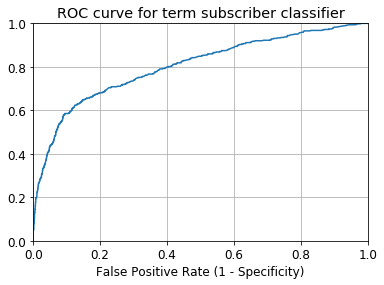

In [115]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for term subscriber classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [116]:
auc_roc_1 = str(roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC with dimensionality reduction: 
0.8029060191596051
AUC without dimensionality reduction: 
0.7968618396212717


In [117]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

#Basic terminology
#True Positives (TP): we correctly predicted that they would default.
#262
#True Negatives (TN): we correctly predicted that they won't default.
#3538
#False Positives (FP): we incorrectly predicted that they did default.
#118
#Falsely predict positive
#Type I error
#False Negatives (FN): we incorrectly predicted that they didn't default.
#201
#Falsely predict negative
#Type II error

[[3607   49]
 [ 354  109]]


In [118]:
score = gbm.score(X_test, y_test)
print(score)

0.9021607186210245
